# Visualizing Samples and Labels from SPARK Dataset

This notebook helps to inspect the SPARK dataset. You can see samples from the dataset, with the corresponding ground truth labels.

In [52]:
# import helper class
import os
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from skimage import io  
from ast import literal_eval
from random import randint
import pandas as pd

In [53]:
def process_labels(labels_dir,split):
    path = os.path.join(labels_dir, f"{split}.csv")
    labels = pd.read_csv(path)
    return  labels

class SparkDataset:
    """ Class for dataset inspection: easily accessing single images, and corresponding ground truth pose data. """

    def __init__(self, class_map, root_dir='./data',split='train'):
        self.root_dir = root_dir
        self.labels = process_labels(root_dir, split)
        self.class_map =  class_map
        self.split = split

    def get_image(self, i=0):

        """ Loading image as PIL image. """

        sat_name = self.labels.iloc[i]['class']
        img_name = self.labels.iloc[i]['filename']
        image_name = os.path.join(self.root_dir, "images", self.split, img_name)

        image = io.imread(image_name)

        return image , self.class_map[sat_name]

    def get_bbox(self, i=0):

        """ Getting bounding box for image. """

        bbox = self.labels.iloc[i]['bbox']
        bbox    = literal_eval(bbox)
        
        min_x, min_y, max_x, max_y = bbox

        return min_x, min_y, max_x, max_y 



    def visualize(self,i, size=(15,15),  ax=None):

        """ Visualizing image, with ground truth pose with axes projected to training image. """

        if ax is None:
            ax = plt.gca()
            
        image, img_class = self.get_image(i)
        min_x, min_y, max_x, max_y   = self.get_bbox(i)

        ax.imshow(image,vmin=0, vmax=255)


        rect = mpatches.Rectangle((min_y, min_x), max_y - min_y, max_x - min_x,
                                        fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
        label = f"{list(self.class_map.keys())[list(self.class_map.values()).index(img_class)]}"
        
        ax.text(min_y, min_x-20, label,color='white',fontsize=15)
        ax.set_axis_off()

        return 

In [54]:
# set up the path to a local copy of the SPARK dataset, labels csv files should be in the same directory.
dataset_root_dir='../datasets/stream1/' # dataset directory
split='train' #split: train,valid,test
total_images=len(os.listdir(os.path.join(dataset_root_dir, "images", "train"))) # total number of images in the split
class_map= {'proba_2':0, 'cheops':1, 'debris':2, 'double_star':3, 'earth_observation_sat_1':4, 'lisa_pathfinder':5,
                           'proba_3_csc' :6, 'proba_3_ocs':7, 'smart_1':8, 'soho':9, 'xmm_newton':10} # Class map

dataset = SparkDataset(class_map, root_dir=dataset_root_dir,split=split)

### Displaying random set of images

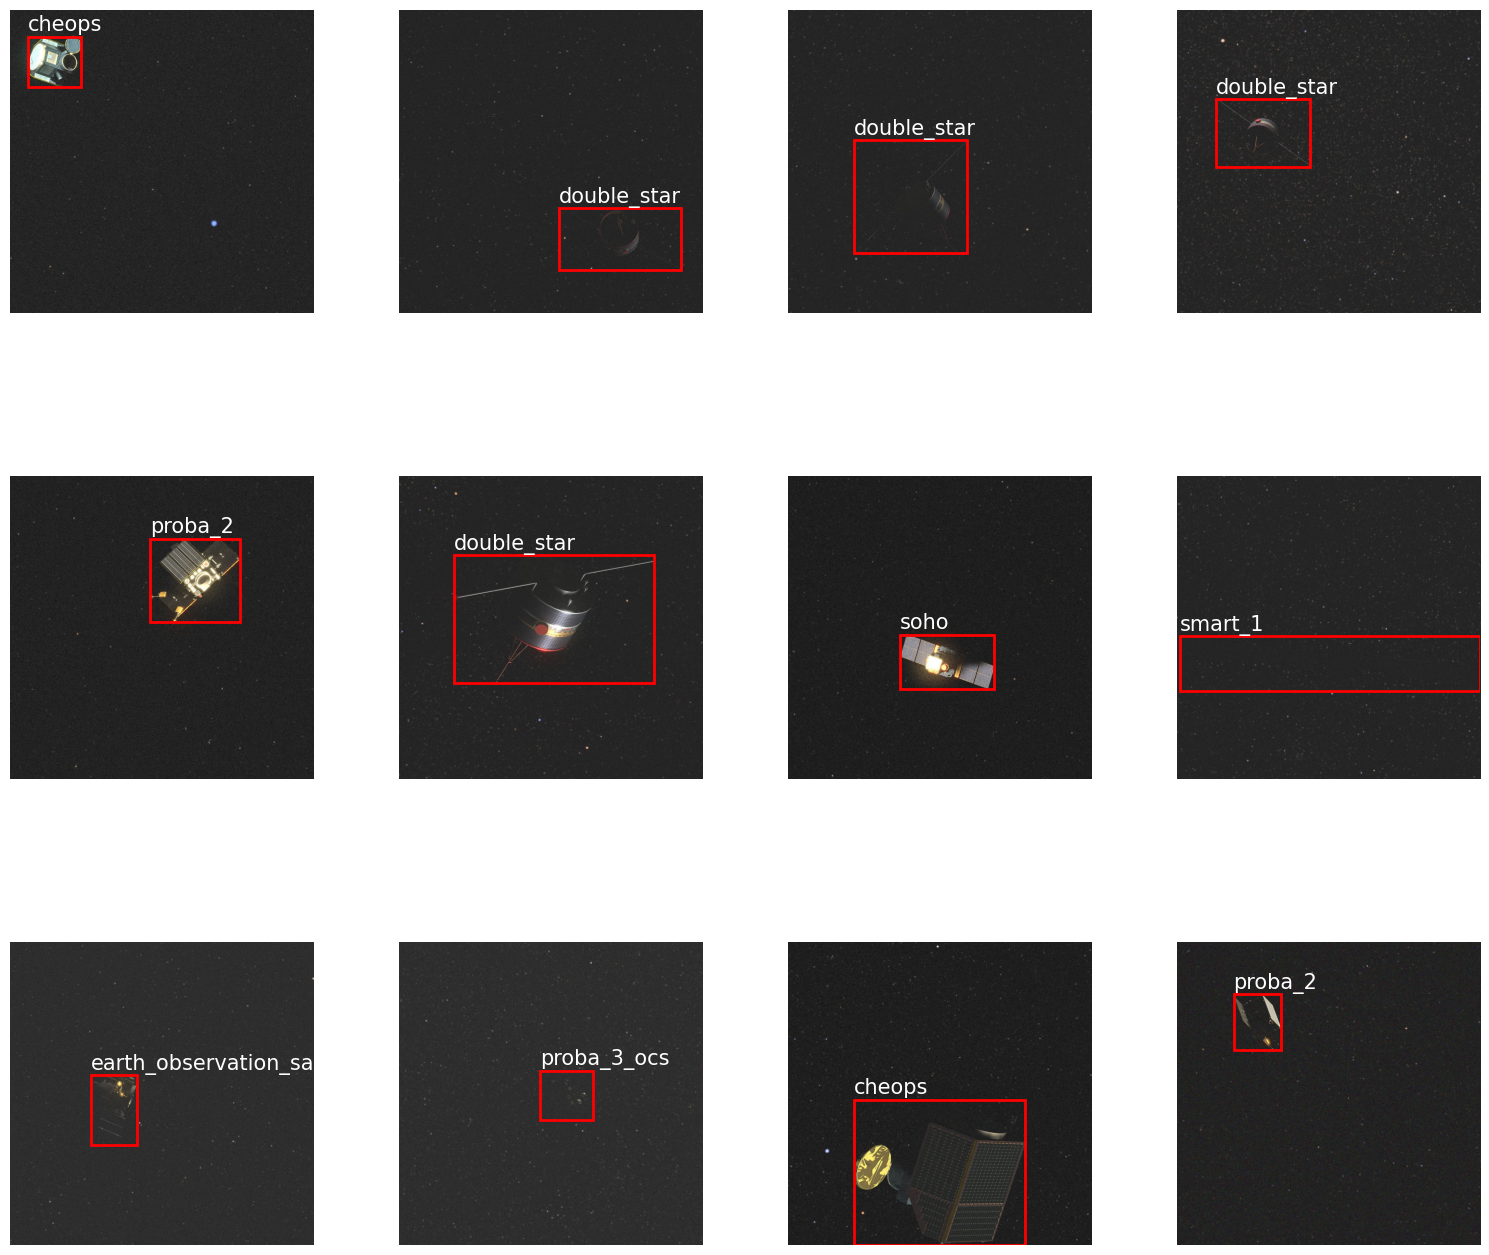

In [55]:
rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

for i in range(rows):
    for j in range(cols):
        dataset.visualize(randint(0, total_images),size = (10,10),ax=axes[i][j])
        axes[i][j].axis('off')
fig.tight_layout() 